In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
cifar10=tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

exploring data

In [3]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [47]:
test_labels=test_labels.astype(int)

array([3, 8, 8, ..., 5, 1, 7])

In [43]:
test_labels=np.reshape(test_labels,10000)
test_labels


array([3, 8, 8, ..., 5, 1, 7])

In [8]:
len(test_labels)

10000

In [9]:
len(train_labels)


50000

In [49]:
train_labels=train_labels.astype(int)
train_labels=np.reshape(train_labels,50000)
train_labels

array([6, 9, 9, ..., 9, 1, 1])

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

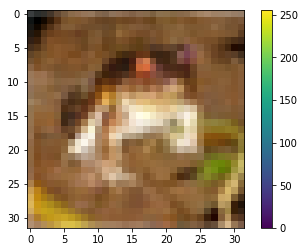

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

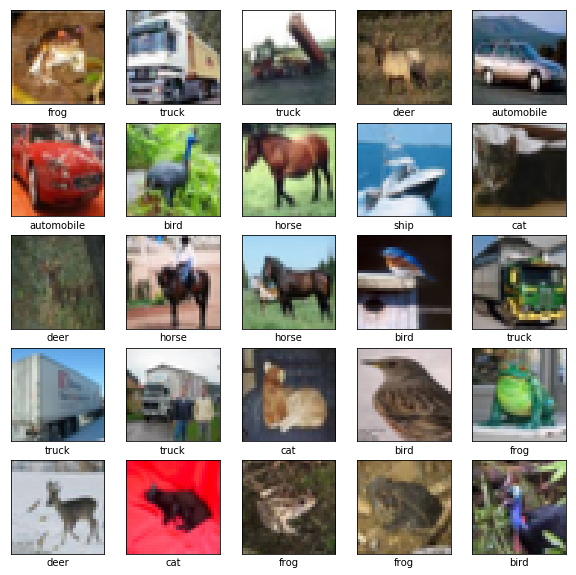

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 277us/sample - loss: 1.9116 - accuracy: 0.3144
Epoch 2/10
50000/50000 [==============================] - 8s 170us/sample - loss: 1.7577 - accuracy: 0.3674
Epoch 3/10
50000/50000 [==============================] - 8s 159us/sample - loss: 1.7126 - accuracy: 0.3827
Epoch 4/10
50000/50000 [==============================] - 9s 180us/sample - loss: 1.6755 - accuracy: 0.3974
Epoch 5/10
50000/50000 [==============================] - 9s 173us/sample - loss: 1.6542 - accuracy: 0.4053
Epoch 6/10
50000/50000 [==============================] - 9s 184us/sample - loss: 1.6355 - accuracy: 0.4130
Epoch 7/10
50000/50000 [==============================] - 9s 175us/sample - loss: 1.6240 - accuracy: 0.4179
Epoch 8/10
50000/50000 [==============================] - 9s 179us/sample - loss: 1.6149 - accuracy: 0.4216
Epoch 9/10
50000/50000 [==============================] - 9s 182us/sample - loss: 1.6002 - accuracy: 0.4276
Epoc

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.7065 - accuracy: 0.4161

Test accuracy: 0.4161


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([0.0165834 , 0.00941854, 0.1773924 , 0.27759048, 0.07641526,
       0.178843  , 0.22687303, 0.01122151, 0.02143298, 0.00422936],
      dtype=float32)

In [21]:
np.argmax(predictions[0])

3

In [22]:
test_labels[0]

array([3], dtype=uint8)

In [52]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

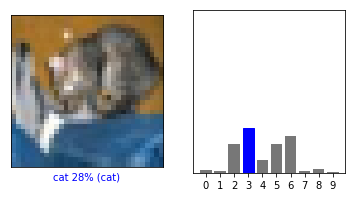

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

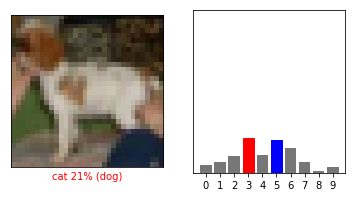

In [54]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

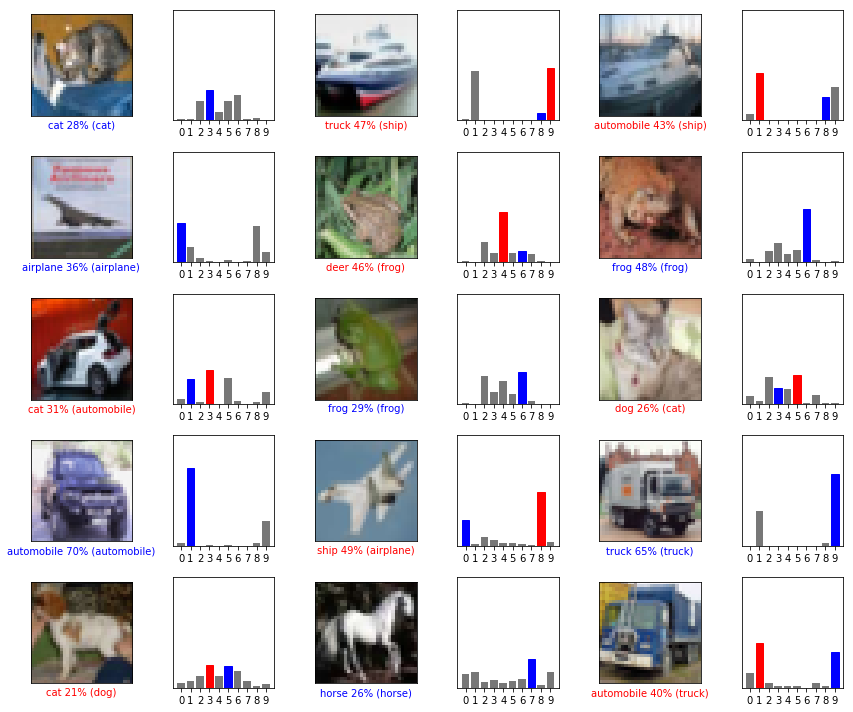

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()